### **Load data**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
data = np.genfromtxt('china-gdp.csv',dtype=float,delimiter=',',skip_header=1)
data

array([[1.96000000e+03, 5.91841165e+10],
       [1.96100000e+03, 4.95570502e+10],
       [1.96200000e+03, 4.66851785e+10],
       [1.96300000e+03, 5.00973033e+10],
       [1.96400000e+03, 5.90622549e+10],
       [1.96500000e+03, 6.97091531e+10],
       [1.96600000e+03, 7.58794348e+10],
       [1.96700000e+03, 7.20570286e+10],
       [1.96800000e+03, 6.99934979e+10],
       [1.96900000e+03, 7.87188205e+10],
       [1.97000000e+03, 9.15062113e+10],
       [1.97100000e+03, 9.85620238e+10],
       [1.97200000e+03, 1.12159814e+11],
       [1.97300000e+03, 1.36769878e+11],
       [1.97400000e+03, 1.42254742e+11],
       [1.97500000e+03, 1.61162492e+11],
       [1.97600000e+03, 1.51627687e+11],
       [1.97700000e+03, 1.72349014e+11],
       [1.97800000e+03, 1.48382112e+11],
       [1.97900000e+03, 1.76856525e+11],
       [1.98000000e+03, 1.89649992e+11],
       [1.98100000e+03, 1.94369049e+11],
       [1.98200000e+03, 2.03549627e+11],
       [1.98300000e+03, 2.28950201e+11],
       [1.984000

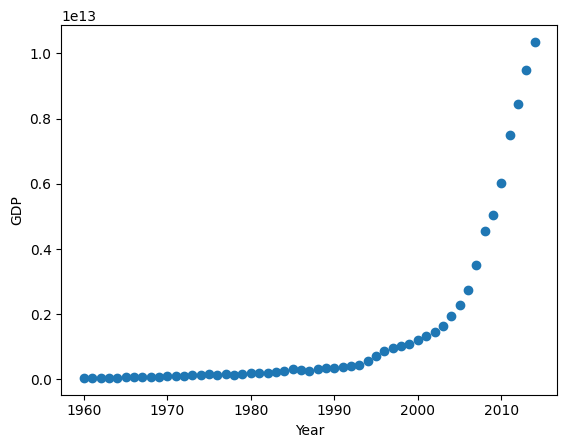

In [7]:
X = data[:,0]
Y = data[:,1]
plt.xlabel("Year")
plt.ylabel("GDP")
plt.scatter(X,Y)


### **Split data for training/testing**

In [63]:
X = data[:,0]/(10**3)
Y = data[:,1]/(10**12)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train.shape

(36,)

In [65]:
X_test.shape

(19,)

### **Build model**
Recap: 
1. Sẽ randomly hai trọng số a và b trong phương trình: $$ y = ax + b $$
- x là data feature
- y là kết quả dự đoán

2. Tính hàm loss: 
$$
\hat{y} = a*x+b
$$ 
$$ 
loss = (\hat{y} - y)^2
$$ 

3. Cập nhật trọng số a và b:
$$
\frac{da}{dloss} = 2* (\hat{y}-y) * x
$$
$$
\frac{db}{dloss} = 2* (\hat{y}-y)
$$
$$
a-= lr*\frac{da}{dloss}
$$
$$
b-= lr*\frac{db}{dloss}
$$

### **Model Gradient Descent**
Là chiến lược cập nhật trọng số sau mỗi lần chạy qua full dataset. 


In [66]:
class LinearRegression_GradientDescent:
    def __init__(self,lr=0.0001,n_epoch=1000):
        self.lr=lr
        self.n_epoch=n_epoch
        self.a = random.random()
        self.b = random.random()
    def fit(self, X,Y):
        N = len(X) # number of samples
        for i in range(self.n_epoch):
            y_hat = self.a*X + self.b
            f = y_hat - Y
            loss = np.sum(f**2)/N
            # Updating m and b
            self.a -= self.lr * (2 * X.dot(f).sum() / N)
            self.b -= self.lr * (2 * f.sum() / N)
            print("Epoch",i+1,",loss",loss)

                    
        


In [67]:
model = LinearRegression_GradientDescent(lr=0.1,n_epoch=10000)
model.fit(X_train, y_train)
model.a


Epoch 1 ,loss 6.88261285507307
Epoch 2 ,loss 6.881551358688787
Epoch 3 ,loss 6.881480297859907
Epoch 4 ,loss 6.881409327589946
Epoch 5 ,loss 6.881338358722136
Epoch 6 ,loss 6.881267391248428
Epoch 7 ,loss 6.881196425168791
Epoch 8 ,loss 6.881125460483201
Epoch 9 ,loss 6.881054497191625
Epoch 10 ,loss 6.880983535294043
Epoch 11 ,loss 6.88091257479042
Epoch 12 ,loss 6.880841615680735
Epoch 13 ,loss 6.880770657964957
Epoch 14 ,loss 6.880699701643061
Epoch 15 ,loss 6.880628746715015
Epoch 16 ,loss 6.880557793180798
Epoch 17 ,loss 6.88048684104038
Epoch 18 ,loss 6.8804158902937305
Epoch 19 ,loss 6.880344940940825
Epoch 20 ,loss 6.880273992981638
Epoch 21 ,loss 6.880203046416137
Epoch 22 ,loss 6.880132101244299
Epoch 23 ,loss 6.880061157466096
Epoch 24 ,loss 6.8799902150814995
Epoch 25 ,loss 6.879919274090479
Epoch 26 ,loss 6.879848334493014
Epoch 27 ,loss 6.879777396289073
Epoch 28 ,loss 6.87970645947863
Epoch 29 ,loss 6.879635524061655
Epoch 30 ,loss 6.879564590038125
Epoch 31 ,loss 6.8794

11.953364833156927

### **Plot line result**

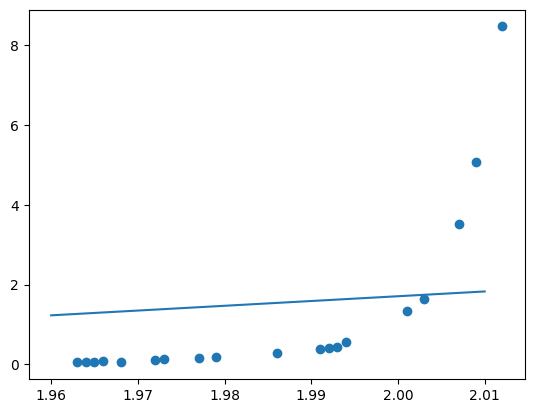

In [68]:
plt.scatter(X_test,y_test)

x = np.linspace(1960/(10**3), 2010/(10**3))
y=model.a*x+model.b
plt.plot(x,y)

plt.show()

Chúng ta thấy rằng, nếu dùng đường thẳng tuyến tính để biểu thị cho xu hướng của tập data thì không thể.
Ta thấy rằng đồ thị trên giống hàm số: 
$$ y = e^x$$

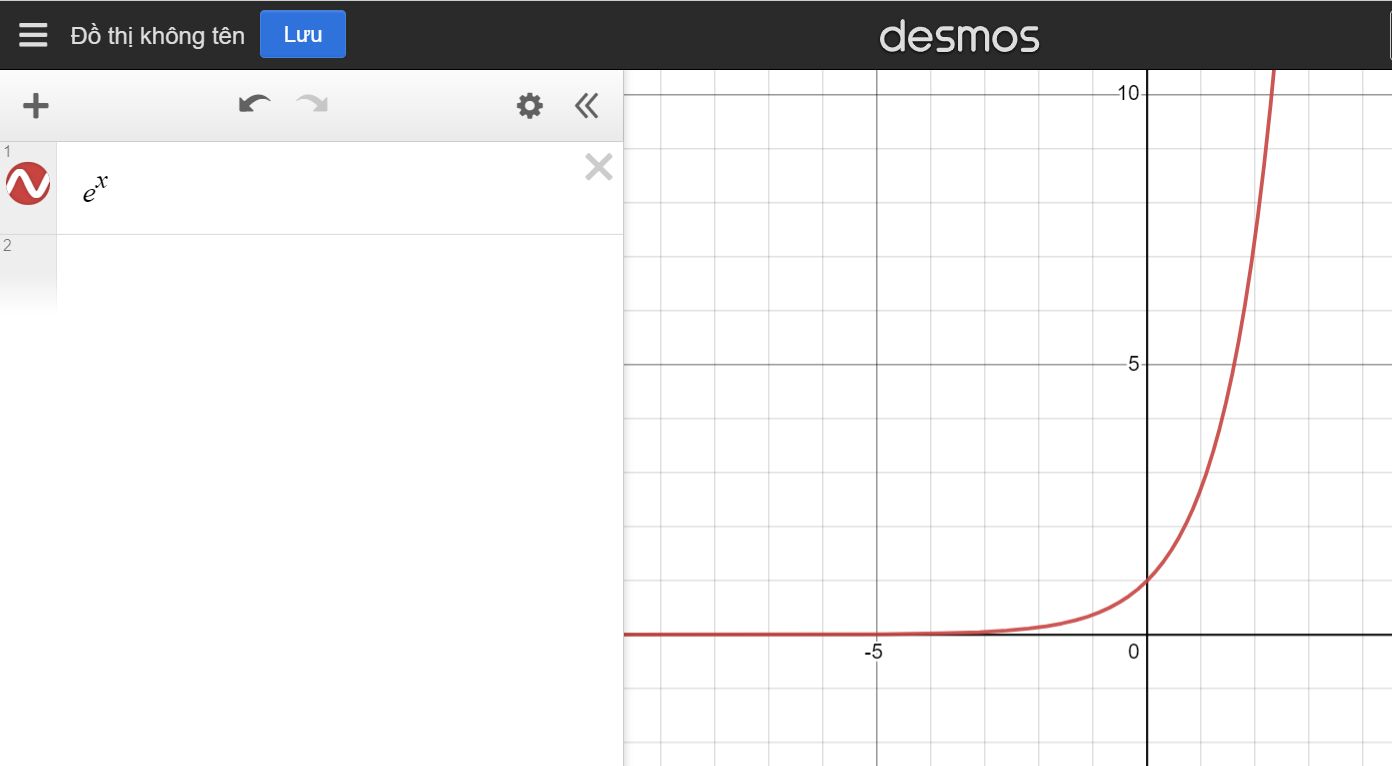

Vậy thì ta sẽ điều chỉnh hàm output để phù hợp.
$$
z = ax+b
$$ 
$$
\hat{y} = e^z
$$
$$ 
loss = (\hat{y} - y)^2
$$ 

**Ôn lại kiến thức Chain Rule**

Ví dụ:
$$ z_1 = a_1*z_0 +b_1 $$
$$ z_2 = a_2*z_1 + b_2 $$

Ta muốn kiếm đạo hàm $z_0$ của $z_2$ ( hay ta viết tắt là $\frac{dz_{0}}{dz_{2}}$)

$$\frac{dz_{0}}{dz_{2}} = \frac{dz_{0}}{dz_{1}} * \frac{dz_{1}}{dz_{2}}$$

Vậy thì theo bài trên, ta có
$$
z = ax+b
$$ 
$$
\hat{y} = e^z
$$
$$ 
loss = (\hat{y} - y)^2
$$ 

Ta muốn kiếm $\frac{da}{dloss}$ và $\frac{db}{dloss}$
$$\frac{da}{dloss} = \frac{da}{dz} * \frac{dz}{d\hat{y}} * \frac{d\hat{y}}{dloss}$$
$$\frac{db}{dloss} = \frac{db}{dz} * \frac{dz}{d\hat{y}} * \frac{d\hat{y}}{dloss}$$
=>
$$\frac{da}{dloss} = x * e^z * 2(\hat{y}-y)$$
$$\frac{db}{dloss} = 1 * e^z * 2(\hat{y}-y)$$

In [76]:
print(np.power(3,X_test))

[8.91145089 8.66050597 8.9212465  8.73695775 8.79473915 9.08942898
 9.00989294 8.86263394 9.02971147 8.72736449 9.11943568 8.64149779
 8.93105288 8.94087003 8.68909668 8.77543635 8.67002574 8.65099666
 9.06947939]


In [81]:
import random
class ExponentialRegression_GradientDescent:
    def __init__(self,lr=0.0001,n_epoch=1000):
        self.lr=lr
        self.n_epoch=n_epoch
        self.a = random.random()
        self.b = random.random()
    def fit(self, X,Y):
        N = len(X) # number of samples
        for i in range(self.n_epoch):
            y_hat = np.power(self.a,X)*self.b
            f = y_hat - Y
            loss = np.sum(f**2)/N
            # Updating m and b
            self.a -= self.lr * (2 * ((X-1)*np.power(self.a,X-1)*f).sum() / N)
            self.b -= self.lr * (2 * (np.power(self.a,X)*f).sum()/N)

            # self.a -= self.lr * (2 * (X*np.exp(z)).dot(f).sum() / N)
            # self.b -= self.lr * (2 * np.exp(z).dot(f).sum() / N)
            print("Epoch",i+1,",loss",loss)


### **Thêm hàm exp vào output**

In [69]:
import random
class ExponentialRegression_GradientDescent:
    def __init__(self,lr=0.0001,n_epoch=1000):
        self.lr=lr
        self.n_epoch=n_epoch
        self.a = random.random()
        self.b = random.random()
    def fit(self, X,Y):
        N = len(X) # number of samples
        for i in range(self.n_epoch):
            z = self.a*X + self.b
            y_hat = np.exp(z)
            f = y_hat - Y
            loss = np.sum(f**2)/N
            # Updating m and b
            self.a -= self.lr * (2 * (X*np.exp(z)).dot(f).sum() / N)
            self.b -= self.lr * (2 * np.exp(z).dot(f).sum() / N)
            print("Epoch",i+1,",loss",loss)


In [83]:
model = ExponentialRegression_GradientDescent(lr=0.001, n_epoch=100000)
model.fit(X_train, y_train)
print(model.a,model.b)

Epoch 1 ,loss 8.286003332051886
Epoch 2 ,loss 8.284042380865321
Epoch 3 ,loss 8.282090446775136
Epoch 4 ,loss 8.28014749584968
Epoch 5 ,loss 8.278213494323158
Epoch 6 ,loss 8.276288408594809
Epoch 7 ,loss 8.274372205228117
Epoch 8 ,loss 8.272464850949998
Epoch 9 ,loss 8.270566312649992
Epoch 10 ,loss 8.268676557379498
Epoch 11 ,loss 8.266795552350942
Epoch 12 ,loss 8.264923264937039
Epoch 13 ,loss 8.263059662669962
Epoch 14 ,loss 8.261204713240584
Epoch 15 ,loss 8.259358384497716
Epoch 16 ,loss 8.257520644447307
Epoch 17 ,loss 8.255691461251692
Epoch 18 ,loss 8.253870803228818
Epoch 19 ,loss 8.252058638851498
Epoch 20 ,loss 8.250254936746636
Epoch 21 ,loss 8.248459665694481
Epoch 22 ,loss 8.246672794627877
Epoch 23 ,loss 8.244894292631514
Epoch 24 ,loss 8.243124128941188
Epoch 25 ,loss 8.241362272943055
Epoch 26 ,loss 8.239608694172903
Epoch 27 ,loss 8.237863362315407
Epoch 28 ,loss 8.236126247203414
Epoch 29 ,loss 8.234397318817214
Epoch 30 ,loss 8.232676547283809
Epoch 31 ,loss 8.230

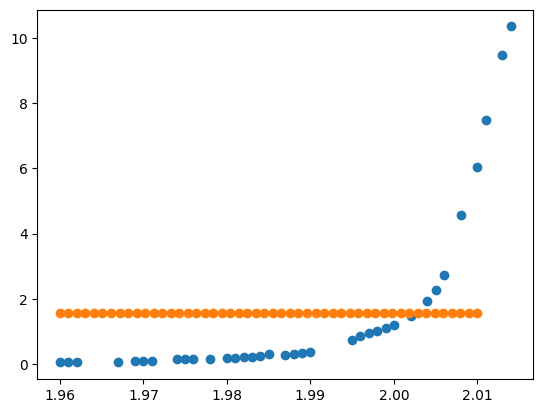

In [79]:
plt.scatter(X_train,y_train)

x = np.linspace(1960/(10**3), 2010/(10**3))
y=np.power(model.a,x) + model.b
# print((y-y_train).sum())
plt.scatter(x,y)

plt.show()